## -----------Start M3-Week 13 Assignment/28th Nov 2016------------------------------
<li><strong>Title:</strong> Module 3 / Week 13: Graph Theory  
<li><strong>Purpose:</strong>Graph Theory with Blog Data Set
<li><strong>Name:</strong>RAJESH ASHOK JAISWAL UIN:669012329
<li><strong>DATED:</strong>11/28/2016

#### Here I am going to import all required parameters and classifier

In [1]:
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt

### ------------------------------------How we worked on this------------------------------------------

In mathematics graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices, nodes, or points which are connected by edges, arcs, or lines.

In [2]:
# Here I am going to fetch our polblog rating into local dictionary "RGraph"
RGraph=nx.read_gml("polblogs.gml")

In [3]:
#Display Data present in polblog file
RGraph.node

{u'tsrightdominion.blogspot.com': {u'source': u'Blogarama', u'value': 1},
 u'rightrainbow.com': {u'source': u'Blogarama', u'value': 1},
 u'gregpalast.com': {u'source': u'LabeledManually', u'value': 0},
 u'younglibs.com': {u'source': u'Blogarama', u'value': 0},
 u'blotts.org/polilog': {u'source': u'Blogarama', u'value': 0},
 u'marylandpolitics.blogspot.com': {u'source': u'BlogCatalog', u'value': 1},
 u'blogitics.com': {u'source': u'eTalkingHead', u'value': 0},
 u'thesakeofargument.com': {u'source': u'Blogarama', u'value': 1},
 u'joebrent.blogspot.com': {u'source': u'Blogarama', u'value': 0},
 u'thesiliconmind.blogspot.com': {u'source': u'Blogarama', u'value': 0},
 u'40ozblog.blogspot.com': {u'source': u'Blogarama,BlogCatalog', u'value': 0},
 u'randomjottings.net': {u'source': u'eTalkingHead', u'value': 1},
 u'sonsoftherepublic.com': {u'source': u'Blogarama', u'value': 1},
 u'rightvoices.com': {u'source': u'CampaignLine', u'value': 1},
 u'americasteen.tk': {u'source': u'Blogarama', u'val

In [4]:
# create weighted graph from RGraph Data
RG = nx.Graph()
for u,v,data in RGraph.edges_iter(data=True):
    if RG.has_edge(u,v):
        RG[u][v]['weight'] += 1
    else:
        RG.add_edge(u, v, weight=1)

## ---------------------------------------Task Work------------------------------------------
Here I have worked on below three pointers:
<li>1.  Create a nice looking graph of the political blog network
<li>2.  What are the 10 most influential blogs
<li>3.  What are the 10 least influential blogs?

###  1st Task :Create a nice looking graph of the political blog network

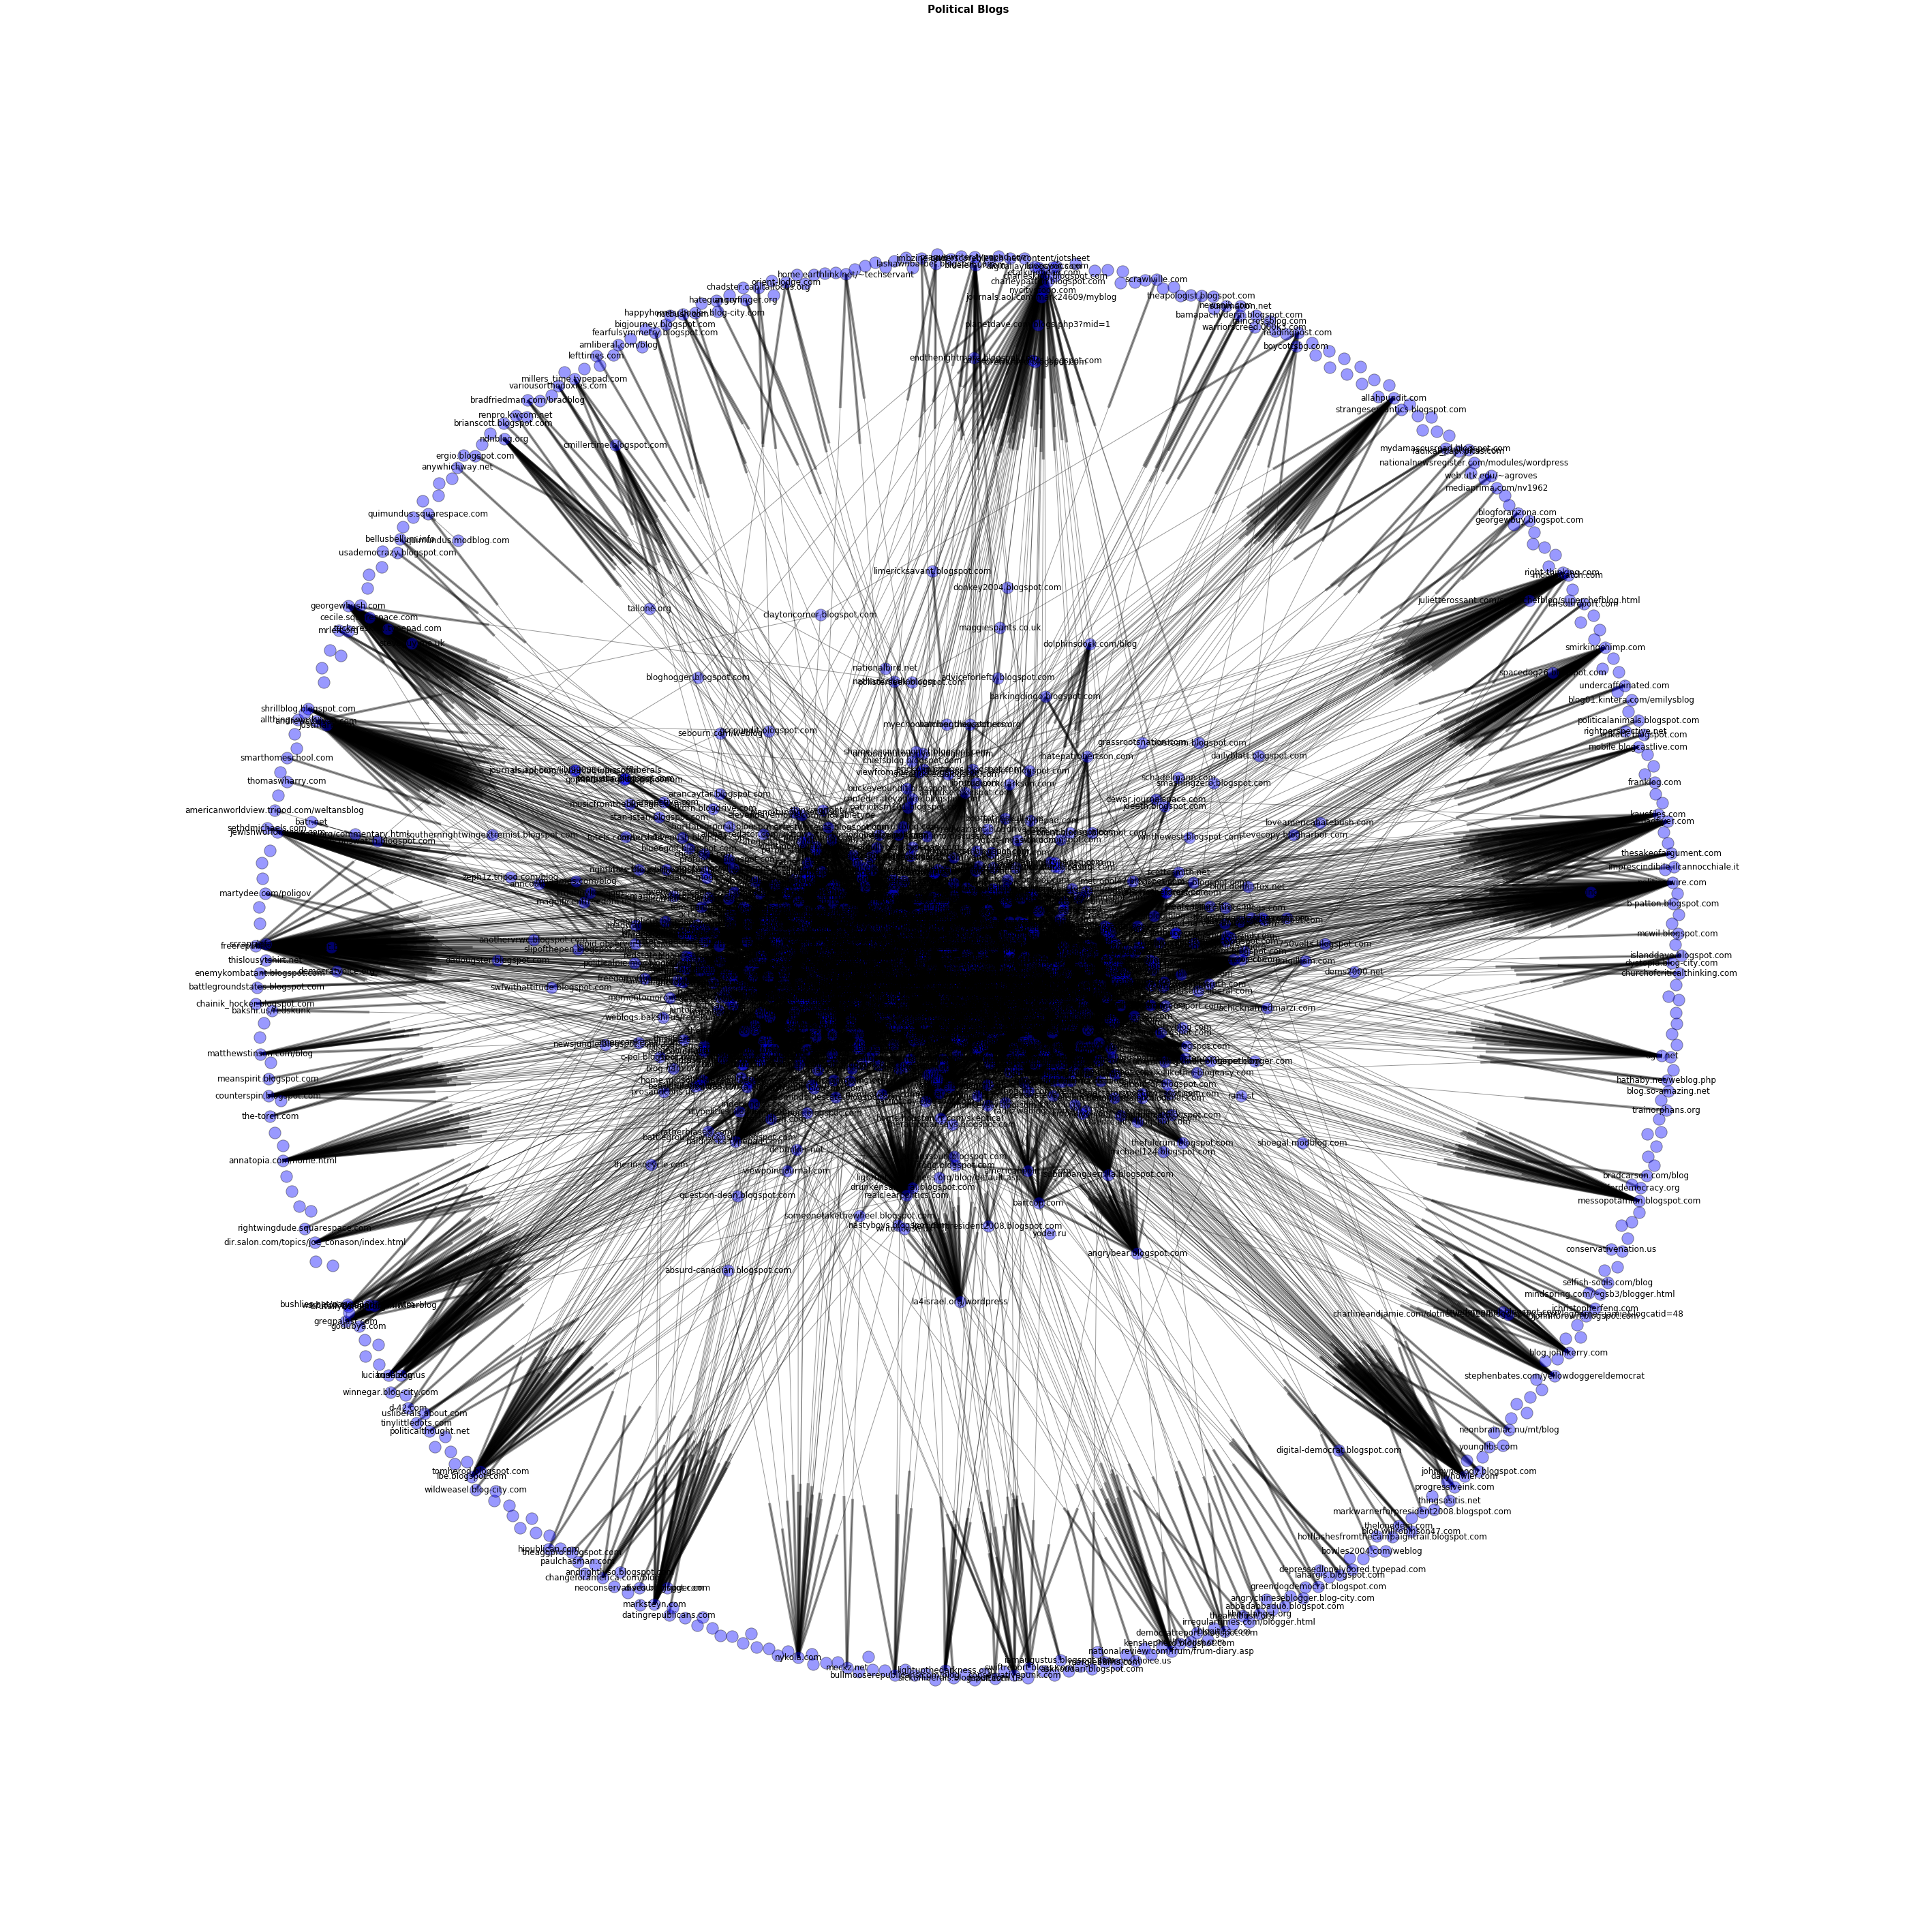

In [5]:
plt.figure(figsize=(50,50))
pos=nx.spring_layout(RGraph ,iterations=400, scale=6, k=.2)
nx.draw_networkx_labels(RG,pos,fontsize=8)
font = {    'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 15}
plt.title("Political Blogs", font)

nx.draw_networkx_nodes(RGraph,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(RGraph,pos,alpha=0.4,node_size=0,width=1,edge_color='K')
plt.axis('off')
plt.show()

### ------------------------Centrality---------------------------------------
In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease.

In [6]:
## Here I am going to calculate centrality (importnace of each vertex)
centrality= nx.eigenvector_centrality_numpy(RG)

In [7]:
#Dispaly Centrality of each vertex(Blog post inportance)
centrality

{u'tsrightdominion.blogspot.com': 0.00829129964142175,
 u'rightrainbow.com': 0.004209535546225827,
 u'truebluegal.blogspot.com': 0.003754693895577346,
 u'newleftblogs.blogspot.com': 0.10122609689804525,
 u'kippsblog.com': 0.0003217146398810954,
 u'jmbzine.com': 0.0006553614366226509,
 u'stillfighting.blogspot.com': 0.009705937331363261,
 u'lashawnbarber.com': 0.04748144281200242,
 u'gregpalast.com': 0.020468354635451394,
 u'roxanne.typepad.com': 0.06526295756890402,
 u'jinkythecat.blogspot.com': 0.011469260233517966,
 u'johnkerrymustlose.com': 0.004034591216006685,
 u'robbernard.com': 0.009710848569067282,
 u'interested-participant.blogspot.com': 0.0103877662051245,
 u'dimmykarras.blogspot.com': 0.004594658096206785,
 u'beastsbelly.blogspot.com': 0.01636529723985172,
 u'leonards-digest.blogspot.com': 0.002106012320964453,
 u'laughingwolf.net': 0.015903504027931843,
 u'tbogg.blogspot.com': 0.13704857535546838,
 u'daddypundit.blogspot.com': 0.0070501093389402905,
 u'tomburka.com': 0.0362

In [8]:
for key, val in centrality.iteritems():
   centrality[key]= round(val ,2)

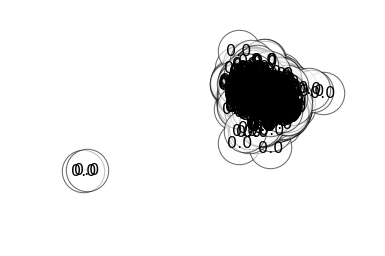

In [9]:
from matplotlib import pyplot as plt
pos=nx.spring_layout(RG)
nx.draw_networkx_labels(RG,pos,centrality,font_size=16)
nx.draw_networkx_nodes(RG,pos,node_size=1800, alpha=.6, node_color='w')
nx.draw_networkx_edges(RG, pos)
plt.axis('off')
plt.show()

## ---------------2st Task :What are the 10 most influential blogs?------------------------------
<li> First we will arrange centrality of each vertex in desending way.
<li> Pick first 10 blog from that list which are our top 10 most influential blogs of given data

In [10]:
## Here will Sort and order blog lists value according to centrality
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [11]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.19),
 (u'dailykos.com', 0.16),
 (u'washingtonmonthly.com', 0.15),
 (u'tbogg.blogspot.com', 0.14),
 (u'bodyandsoul.typepad.com', 0.14),
 (u'digbysblog.blogspot.com', 0.14),
 (u'liberaloasis.com', 0.14),
 (u'talkingpointsmemo.com', 0.13),
 (u'corrente.blogspot.com', 0.13),
 (u'pandagon.net', 0.12),
 (u'billmon.org', 0.12),
 (u'dneiwert.blogspot.com', 0.12),
 (u'madkane.com/notable.html', 0.11),
 (u'nielsenhayden.com/electrolite', 0.11),
 (u'elayneriggs.blogspot.com', 0.11),
 (u'michaelberube.com', 0.11),
 (u'xnerg.blogspot.com', 0.11),
 (u'pacificviews.org', 0.11),
 (u'busybusybusy.com', 0.11),
 (u'instapundit.com', 0.11),
 (u'newleftblogs.blogspot.com', 0.1),
 (u'talkleft.com', 0.1),
 (u'politicalstrategy.org', 0.1),
 (u'rogerailes.blogspot.com', 0.1),
 (u'theleftcoaster.com', 0.1),
 (u'crookedtimber.org', 0.1),
 (u'prospect.org/weblog', 0.1),
 (u'reachm.com/amstreet', 0.1),
 (u'wampum.wabanaki.net', 0.1),
 (u'thetalkingdog.com', 0.09),
 (u'juancole.com', 0.0

In [12]:
#Here I will store 10 most influential blogs in 'First_10_ordered' dictonary
First_10_ordered=sorted(blog_list, key=lambda x: x[1], reverse=True)

In [13]:
#Display 10 most influential blogs
First_10_ordered[:10]

[(u'atrios.blogspot.com', 0.19),
 (u'dailykos.com', 0.16),
 (u'washingtonmonthly.com', 0.15),
 (u'tbogg.blogspot.com', 0.14),
 (u'bodyandsoul.typepad.com', 0.14),
 (u'digbysblog.blogspot.com', 0.14),
 (u'liberaloasis.com', 0.14),
 (u'talkingpointsmemo.com', 0.13),
 (u'corrente.blogspot.com', 0.13),
 (u'pandagon.net', 0.12)]

## Task 2 Result: 10 most influential blogs are above blogs as per the output 13

## ---------------3rd Task :What are the 10 least influential blogs?------------------------------
<li> First we will arrange centrality of each vertex in ascending way.
<li> Pick first 10 blog from that list which are our top 10 least influential blogs of given data

In [14]:
#Here I will store 10 least influential blogs in 'Last_10_ordered' dictonary
Last_10_ordered=sorted(blog_list, key=lambda x: x[1], reverse=False)

In [15]:
#Display 10 Least influential blogs
Last_10_ordered[:10]

[(u'rightrainbow.com', 0.0),
 (u'truebluegal.blogspot.com', 0.0),
 (u'kippsblog.com', 0.0),
 (u'jmbzine.com', 0.0),
 (u'johnkerrymustlose.com', 0.0),
 (u'dimmykarras.blogspot.com', 0.0),
 (u'leonards-digest.blogspot.com', 0.0),
 (u'digitaljay.blogspot.com', 0.0),
 (u'rabner.blogspot.com', 0.0),
 (u'theblogwarrior.blogspot.com', 0.0)]

## Task 3 Result: 10 least influential blogs are above blogs as per the output15

## -------------------------------------Bonus Question--------------------------

#### Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

## -----------------------------End of Assignment---------------------------------------